<a href="https://colab.research.google.com/github/rodmart21/CV/blob/main/SVM_vs_LG_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine vs Vanilla Linear Classifier


We will be classifying the popular handwritten data set which we can find in the sklearn library and comparing the results of the logistic regression and SVM.  In the Sklearn library, there are several ways to use logistic regression for multiclass applications; in this case, we will use  the `multinomial` option.

## 1) Load the libraries and the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
digits = datasets.load_digits()

In [3]:
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

Visualize handwritten images in the dataset.

Total number of images: 1797


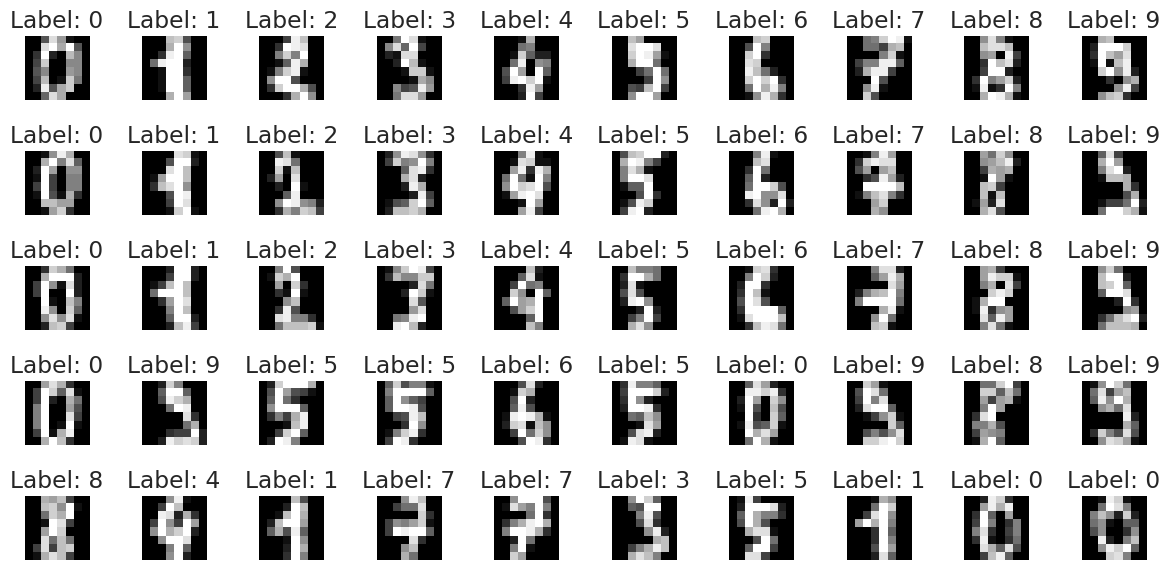

In [38]:
n_rows = 5
n_cols = 10

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))

for i in range(n_rows):
    for j in range(n_cols):
        index = i * n_cols + j
        axes[i, j].imshow(digits.images[index], cmap='gray')
        axes[i, j].set_title(f"Label: {digits.target[index]}")
        axes[i, j].axis('off')

plt.tight_layout()
print(f"Total number of images: {len(digits.images)}")
plt.show()

There are 8x8 pixels in every image. This can be considered a low number, but it is enough to make a good representation and less costly in terms of computational efficiency and memory usage.

Divide into training and test data.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(flatten_digits, target, test_size=0.2)

## 2) Image classification with Logistic Regression.

Standardize the dataset to put all the features of the variables on the same scale. Standarization is a common process in the data preproccesing where tranforms are made so there is a mean of 0 and a standard deviation of 1.

In [28]:
X_train.shape

(1437, 64)

In [6]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [39]:
X_train_logistic

array([[ 0.        ,  0.79093211,  1.85064378, ..., -0.3092124 ,
        -0.50876028, -0.19466103],
       [ 0.        , -0.33549945,  0.17187783, ..., -1.15718608,
        -0.50876028, -0.19466103],
       [ 0.        , -0.33549945, -0.03796791, ...,  1.55632972,
         3.44707886,  8.41235147],
       ...,
       [ 0.        , -0.33549945, -1.08719664, ...,  0.02997708,
        -0.50876028, -0.19466103],
       [ 0.        ,  0.79093211,  1.4309523 , ...,  0.19957182,
        -0.26152033, -0.19466103],
       [ 0.        , -0.33549945, -1.08719664, ..., -1.15718608,
        -0.50876028, -0.19466103]])

Create the logistic regression and fit the logistic regression and use the <code>l1</code> penalty. Note here that since this is a multiclass problem the Logistic Regression parameter `multi_class` is set to `multinomial`.


In [7]:
logit = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

In [8]:
logit.fit(X_train_logistic, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [9]:
y_pred_logistic = logit.predict(X_test_logistic)

Get the accuracy of the logistic regression


In [10]:
print("Accuracy: "+str(logit.score(X_test_logistic, y_test)))

Accuracy: 0.8111111111111111


Lets plot out the confusion matrix, each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.


In [11]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

Accuracy is fine and above 80% but we can see some heavily misclassified values, The classifier had a hard time classifying <code>8</code>


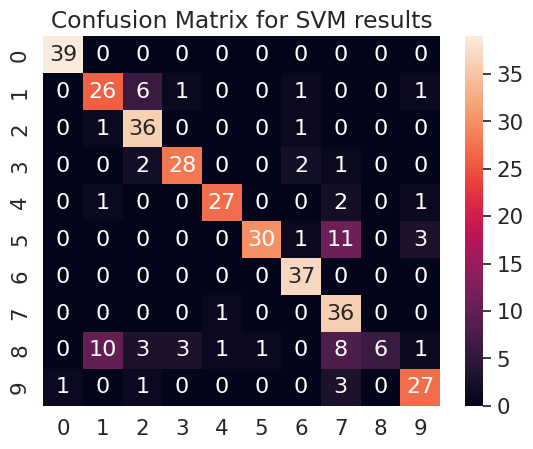

In [12]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## 3) Using SVM.


Create and fit the SVM model


In [13]:
svm_classifier = svm.SVC(gamma='scale')

In [14]:
svm_classifier.fit(X_train, y_train)

SVC()

Predict for our test set


In [15]:
y_pred_svm = svm_classifier.predict(X_test)

Get accuracy for the SVM model, we can see we have a nearly perfect model


In [16]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.9861111111111112


Let's take a look at the confusion matrix for SVM, we can see a nearly perfect model with SVM


In [17]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

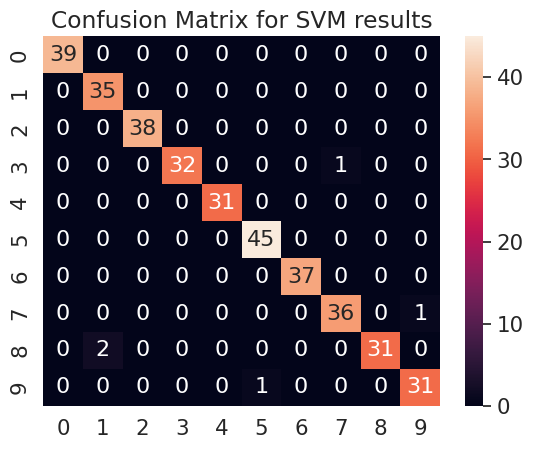

In [18]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## 4) Comparing both SVM and Logistic Regression with K-Fold Cross Validation

k-fold Cross validation is used when there are limited samples, the handwritten dataset contains about 1800 samples, this will give an opportunity for all the data to be in the training and test set at different given times. We will add <code>l2</code> regularization to visualize how well they both do against SVM.


K-fold cross-validation divides the data into 10 different parts, using 90% for training and 10% for testing in each iteration. Afterwards, all the results obtained are analyzed to assess how the accuracy has evolved with each interaction.

In [21]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    #k_fold = model_selection.KFold(n_splits=10, random_state=10)
    k_fold = model_selection.KFold(n_splits=10, shuffle=True)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

We plot and we can see that SVM performs better all the time even with k-fold cross validation and it is better than both Logistic regressions on average


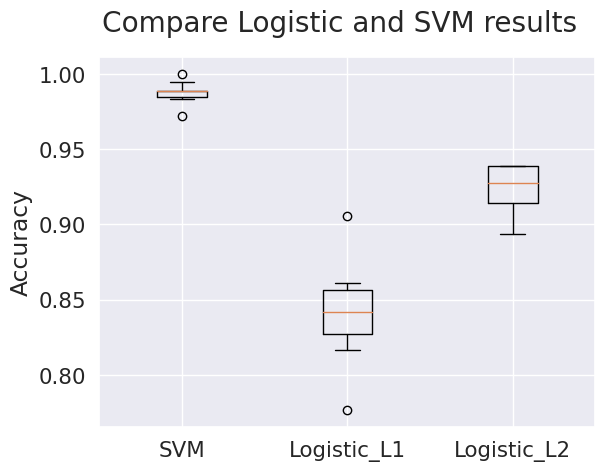

In [22]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()